In [1]:
# !pip install mlxtend
# standard 
import numpy as np
import pandas as pd
import random
import os

# data preprocessing
from sklearn import preprocessing

# exploratory analysis
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap
import seaborn as sns #sb
from IPython.display import Image

# model fit
import statsmodels.api as sm
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers

# prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from mlxtend.plotting import heatmap
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.manifold import TSNE
from sklearn.model_selection import ParameterGrid
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

# This tells matplolib not to try opening a new window for each plot
%matplotlib inline

# silence warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# For producing decision tree diagrams.
from IPython.core.display import Image, display
import pydot
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris



2023-08-06 23:15:33.559181: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-06 23:15:33.587569: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-06 23:15:33.588578: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-06 23:15:34.230952: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
EJ_A_X_Test = pd.read_csv(
    '../Final Files/data/EJ_A_X_Test.csv',
    delimiter='\,'
)
EJ_A_Y_Test = pd.read_csv(
    '../Final Files/data/EJ_A_Y_Test.csv',
    delimiter='\,'
)
EJ_B_X_Test = pd.read_csv(
    '../Final Files/data/EJ_B_X_Test.csv',
    delimiter='\,'
)
EJ_B_Y_Test = pd.read_csv(
    '../Final Files/data/EJ_B_Y_Test.csv',
    delimiter='\,'
)

In [3]:
EJ_A_Y_Test.head()

,Unnamed: 0,class
0,117,0
1,437,0
2,463,0
3,314,0
4,296,0


In [4]:
print("shape: ", EJ_A_X_Test.shape)
print("shape: ", EJ_A_Y_Test.shape)
print("shape: ", EJ_B_X_Test.shape)
print("shape: ", EJ_B_Y_Test.shape)

shape:  (50, 25)
shape:  (50, 2)
shape:  (74, 25)
shape:  (74, 2)


In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Select a single target feature for subgroup A 
EJ_A_Y_Test_single = EJ_A_Y_Test.iloc[:, 1]

# Step 1: Create Random Forest Model for Subgroup A
model_subgroup_A = RandomForestClassifier(random_state=0, n_estimators=200, max_depth=10, )

# Step 2: Fit the Random Forest Model for Subgroup A
model_subgroup_A.fit(EJ_A_X_Test, EJ_A_Y_Test_single)

# Step 3: Make Predictions for Subgroup A using the Test Set
predictions_subgroup_A = model_subgroup_A.predict(EJ_A_X_Test)

print ('Accuracy:', model_subgroup_A.score(EJ_A_X_Test, EJ_A_Y_Test_single))

Accuracy: 1.0


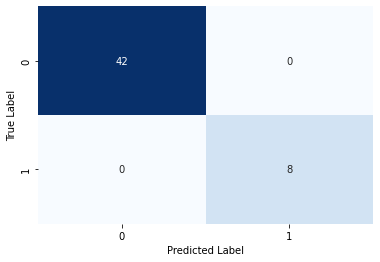

In [6]:
# Step 4: Analyze Confusion Matrix for Subgroup A
confusion_matrix = tf.math.confusion_matrix(EJ_A_Y_Test_single, predictions_subgroup_A)  

label_names = np.unique(EJ_A_Y_Test_single)
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',  
                 xticklabels = label_names, yticklabels = label_names, cbar=False)

ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()


In [7]:
# Select a single target feature for subgroup B 
EJ_B_Y_Test_single = EJ_B_Y_Test.iloc[:, 1]

# Step 1: Create Random Forest Model for Subgroup B
model_subgroup_B = RandomForestClassifier(random_state=0, n_estimators=200, max_depth=10, min_samples_split = 2)

# Step 2: Fit the Random Forest Model for Subgroup B
model_subgroup_B.fit(EJ_B_X_Test, EJ_B_Y_Test_single)

# Step 3: Make Predictions for Subgroup B using the Test Set
predictions_subgroup_B = model_subgroup_B.predict(EJ_B_X_Test)

print ('Accuracy:', model_subgroup_B.score(EJ_B_X_Test, EJ_B_Y_Test_single))

Accuracy: 1.0


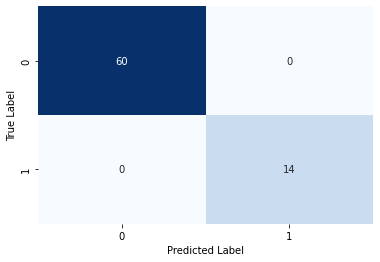

In [8]:
# Step 4: Analyze Confusion Matrix for Subgroup B
confusion_matrix = tf.math.confusion_matrix(EJ_B_Y_Test_single, predictions_subgroup_B)  

label_names = np.unique(EJ_A_Y_Test_single)
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',  
                 xticklabels = label_names, yticklabels = label_names, cbar=False)

ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()
